### Importing the library

In [55]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

### Load the Dataset

In [56]:
playstore_data = pd.read_csv("/Users/imsc/Nishant/DataMunging-GooglePlayStore/Data/googleplaystore.csv")
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Data Cleaning
* Check whether there are any null values and figure out how you want to handle them?\
  **Hint:** isnan(), dropna(), fillna()
* If there is any duplication of a record, drop the duplicates.\
  **Hint:** drop_duplicates()
* Find any non-English and filter them.
* In the size colum, multiply 10,000,000 with entries having M and multiply by 10,000 if we have K in the cell.

### Missing values

In [57]:
playstore_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Drop missing values

In [58]:
playstore_data.dropna(inplace=True)

In [59]:
# identify the duplicate apps
len(set(playstore_data['App'].values)), playstore_data.shape

(8190, (9360, 13))

In [60]:
# Remove the duplicate apps
playstore_data = playstore_data.drop_duplicates(['App'], keep='first')

In [61]:
# Check for any null values
playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [62]:
# Check datatype of each column
playstore_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Find out the Non-English Apps

In [63]:
# below function to detect the string which contains non-english characters
# It oly selects the apps which are having non-english characters atleast half the length of string
# Ex: there are english apps with emoji's and symbols(should be ignore).
# target is to find non-english apps which might alphabets at the ending, but mostly non-english.
def is_English(string):
    spl_count = 0
    for character in string:
        if ord(character) > 127:
            spl_count += 1
    if spl_count > len(string) // 2:
        return False
    return True

In [64]:
# Find the Non-English Apps
playstore_data[~playstore_data['App'].apply(is_English)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
710,Flame - درب عقلك يوميا,EDUCATION,4.6,56065,37M,"1,000,000+",Free,0,Everyone,Education,"July 26, 2018",3.3,4.1 and up
3750,РИА Новости,NEWS_AND_MAGAZINES,4.5,44274,8.0M,"1,000,000+",Free,0,Everyone,News & Magazines,"August 6, 2018",4.0.6,4.4 and up
4193,صور حرف H,ART_AND_DESIGN,4.4,13,4.5M,"1,000+",Free,0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up
5698,日本AV历史,BOOKS_AND_REFERENCE,4.1,215,30M,"10,000+",Free,0,Teen,Books & Reference,"March 6, 2018",1.2,4.0 and up
6406,BL 女性向け恋愛ゲーム◆俺プリクロス,FAMILY,4.2,3379,62M,"100,000+",Free,0,Mature 17+,Simulation,"March 23, 2017",1.6.3,2.3.3 and up
6417,BL 女性向け恋愛ゲーム◆ごくメン,FAMILY,4.2,1901,8.2M,"100,000+",Free,0,Mature 17+,Simulation,"July 7, 2016",1.3.0,2.3.3 and up
6418,あなカレ【BL】無料ゲーム,FAMILY,4.7,6073,8.5M,"100,000+",Free,0,Mature 17+,Simulation,"February 25, 2018",4.2.2,2.3 and up
6420,감성학원 BL 첫사랑,COMICS,4.4,190,34M,"10,000+",Free,0,Everyone,Comics,"November 17, 2017",3.2.1,3.0 and up
6629,BQ-መጽሐፍ ቅዱሳዊ ጥያቄዎች,GAME,4.7,191,7.2M,"5,000+",Free,0,Everyone,Trivia,"July 31, 2018",4.1.2,4.1 and up
9117,لعبة تقدر تربح DZ,FAMILY,4.2,238,6.8M,"10,000+",Free,0,Everyone,Education,"November 18, 2016",6.0.0.0,4.1 and up


In [65]:
# Filter the Non English Apps
playstore_data = playstore_data[playstore_data['App'].apply(is_English)]
playstore_data.shape

(8175, 13)

In the size column, multiply 1000, 000 with M in the cell and multiply by 1000 if we have K in the cell.

In [66]:
playstore_data.Size.value_counts()

Varies with device    1169
14M                    147
12M                    146
11M                    143
13M                    143
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 412, dtype: int64

In [67]:
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in x else x)
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(str(x).rstrip('M'))*(10**6) if 'M' in str(x) else x)
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(str(x).rstrip('k'))*(10**3) if 'k' in str(x) else x)
playstore_data = playstore_data[~(playstore_data['Size'] == 'NaN')]
playstore_data['Size'] = playstore_data['Size'].astype(float)


### Visualization

### 1. Find the number of apps in various categories by using an appropriate plot

In [68]:
playstore_data['Category'].nunique()

33

In [69]:
counts_of_Apps = playstore_data['Category'].value_counts()
counts_of_Apps

FAMILY                 1504
GAME                    831
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               268
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      152
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     140
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                87
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           57
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   46
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

In [70]:
counts_of_Apps.index.values

array(['FAMILY', 'GAME', 'TOOLS', 'PERSONALIZATION', 'LIFESTYLE',
       'MEDICAL', 'FINANCE', 'PRODUCTIVITY', 'BUSINESS', 'SPORTS',
       'PHOTOGRAPHY', 'HEALTH_AND_FITNESS', 'COMMUNICATION', 'SOCIAL',
       'NEWS_AND_MAGAZINES', 'SHOPPING', 'TRAVEL_AND_LOCAL',
       'BOOKS_AND_REFERENCE', 'DATING', 'VIDEO_PLAYERS',
       'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO',
       'ART_AND_DESIGN', 'HOUSE_AND_HOME', 'WEATHER', 'COMICS',
       'PARENTING', 'EVENTS', 'BEAUTY'], dtype=object)

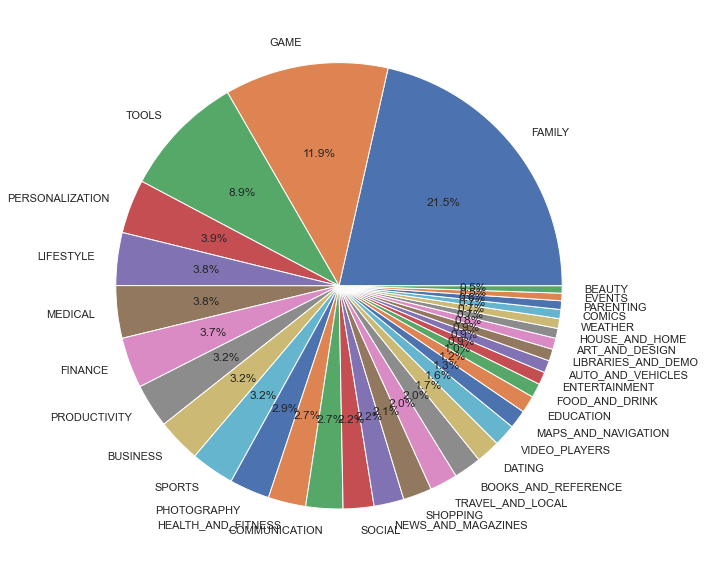

In [71]:
plt.figure(figsize=(10, 15))
plt.pie(counts_of_Apps, labels = counts_of_Apps.index.values, autopct='%1.1f%%')
plt.show()

### Explore the distribution of free and paid apps across different categories
#### Stacked Bar Chart

In [72]:
# Identify the free and paid apps
free_apps = playstore_data[playstore_data.Type == 'Free']
paid_apps = playstore_data[playstore_data.Type == 'Paid']
paid_apps.shape, free_apps.shape

((538, 13), (6468, 13))

In [73]:
paid_categories = paid_apps['Category'].value_counts()
free_categories = free_apps['Category'].value_counts()
paid_categories

FAMILY                 142
GAME                    74
PERSONALIZATION         61
TOOLS                   55
MEDICAL                 54
SPORTS                  20
COMMUNICATION           18
LIFESTYLE               16
PRODUCTIVITY            14
FINANCE                 13
PHOTOGRAPHY             13
BUSINESS                 8
HEALTH_AND_FITNESS       8
BOOKS_AND_REFERENCE      7
WEATHER                  6
TRAVEL_AND_LOCAL         6
EDUCATION                4
MAPS_AND_NAVIGATION      4
ART_AND_DESIGN           3
DATING                   2
NEWS_AND_MAGAZINES       2
SHOPPING                 2
SOCIAL                   2
FOOD_AND_DRINK           1
ENTERTAINMENT            1
PARENTING                1
VIDEO_PLAYERS            1
Name: Category, dtype: int64

In [74]:
len(free_categories), len(paid_categories)

(33, 27)

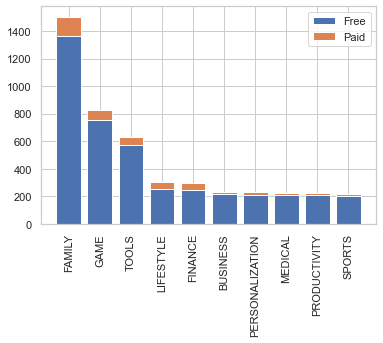

In [75]:
# Bar Chart showing Distribution of Free and Paid apps category wise
N = 10

idx = np.arange(N)

p1 = plt.bar(idx , free_categories.values[:10])
p2 = plt.bar(idx, paid_categories.values[:10], bottom = free_categories.values[:10])

plt.xticks(idx, free_categories.index[:10], rotation=90)
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))
plt.show()


### Represent the distribution of app rating on scale of 1-5 using and appropriate plot

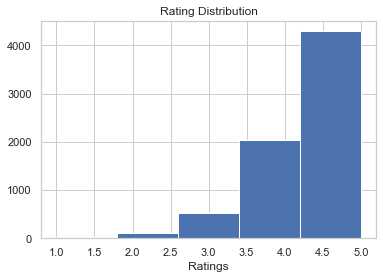

In [76]:
ratings = playstore_data['Rating']

plt.hist(ratings, bins=5)
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.show()

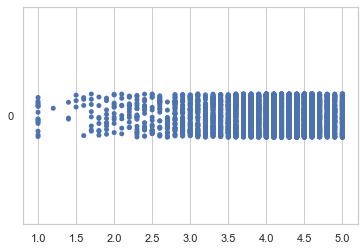

In [77]:
# 2nd option
# Distribution of Rating using stripplot
sns.set(style='whitegrid')
sns.stripplot(data=ratings, jitter=True, orient='h');

### Identify outliers of the rating columns by plotting the boxplot category wise and Handle them
* Removing Outliers using z-score, quantile link

Text(0, 0.5, 'Ratings')

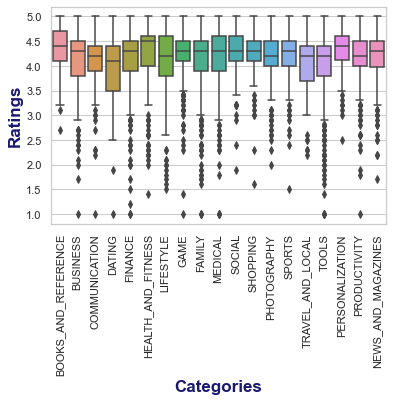

In [78]:
df_categories = playstore_data.groupby('Category').filter(lambda x: len(x) >= 120)

sns.boxplot(y=df_categories.Rating, x = df_categories.Category, data=playstore_data);
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=17, fontweight='bold', color='#191970')
plt.ylabel('Ratings', fontsize=17, fontweight='bold', color='#191970')

In [79]:
def remove_outliers(data):
    data_mean, data_std = data.mean(), data.std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers_removed  = [x if x > lower and x < upper else data_mean for x in data]
    return outliers_removed

In [80]:
playstore_data['Rating'] = remove_outliers(playstore_data['Rating'])

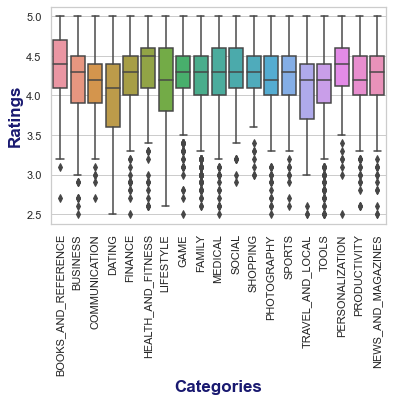

In [81]:
df_categories = playstore_data.groupby('Category').filter(lambda x: len(x) >= 120)

sns.boxplot(y=df_categories.Rating, x = df_categories.Category, data=playstore_data);
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=17, fontweight='bold', color='#191970',)
plt.ylabel('Ratings', fontsize=17, fontweight='bold', color='#191970');

### Plot the barplot of all the categories indicating no.of installs

In [82]:
playstore_data['Installs'] = playstore_data['Installs'].str.rstrip('+').str.replace(',','')
playstore_data['Installs'] = playstore_data['Installs'].astype(int) # Coverting to int

Text(0, 0.5, 'Categories')

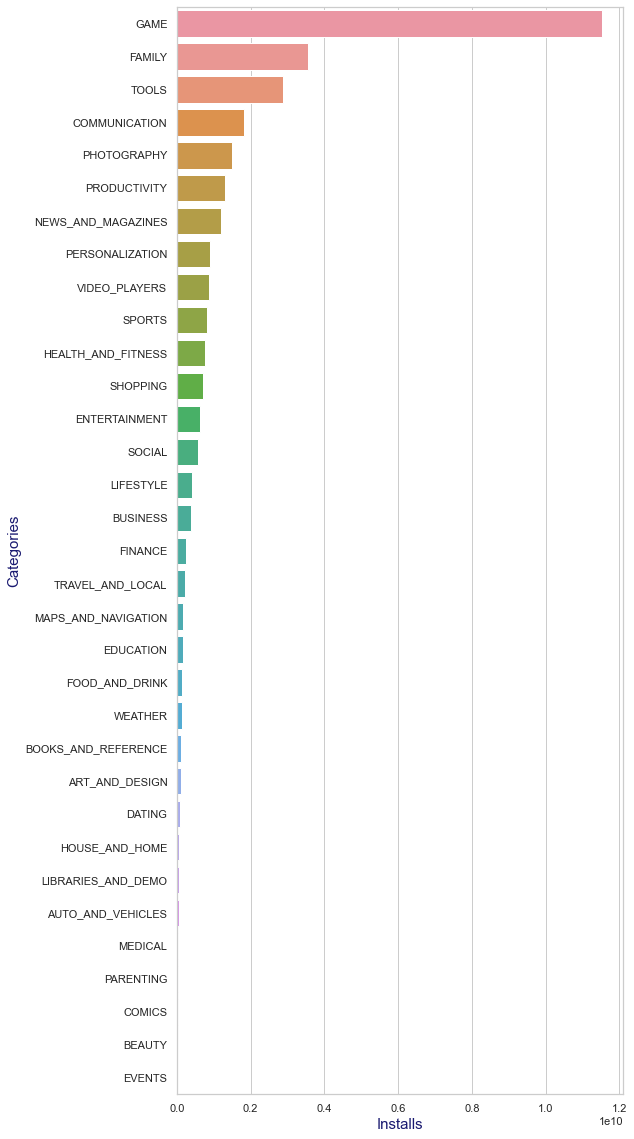

In [83]:
temp_df = playstore_data.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by='Installs', ascending=False).reset_index()

plt.figure(figsize=(8,20))
sns.barplot(x=temp_df['Installs'], y=temp_df['Category'])


plt.yticks(rotation=0)
plt.xlabel('Installs', fontsize=15, color='#191970')
plt.ylabel('Categories', fontsize=15, color='#191970')

### Insights

* Correlate the price with the size of the app

/Users/imsc/opt/anaconda3/envs/DataScience/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


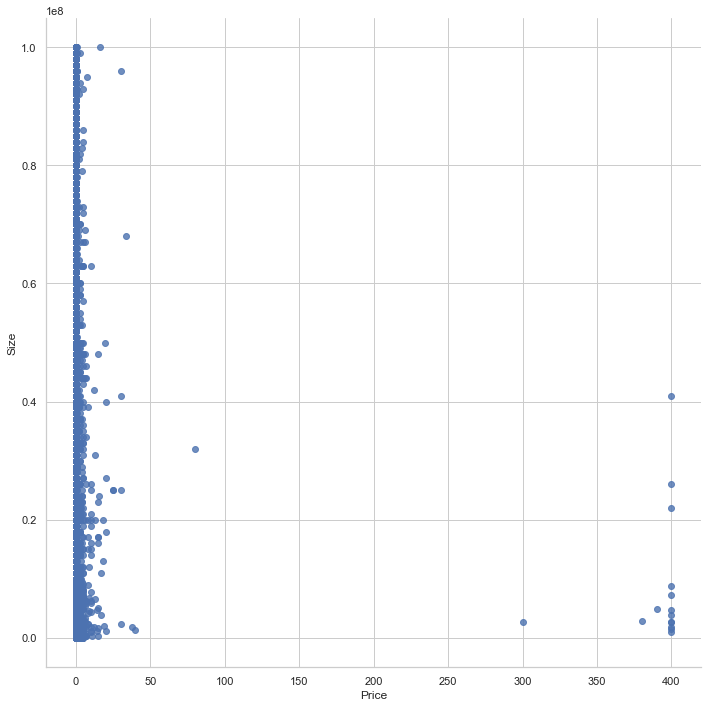

In [84]:
playstore_data['Price'] = playstore_data['Price'].str.lstrip('$')
playstore_data['Price'] = playstore_data['Price'].astype(float)

sns.lmplot(x='Price', y='Size', data=playstore_data, fit_reg=False ,size=10);

**Conclusion:** No particular pattern, increasing or decreasing\
Price does not depend of size of the App

### Popular app categories based on rating and no. of installs

In [86]:
popular_categories = playstore_data.groupby(['Category']).agg({'Installs':'sum', 'Rating':'sum'}).sort_values(by='Rating', ascending=False).reset_index()
popular_categories.head()

,Category,Installs,Rating
0,FAMILY,3552200580,6330.706965
1,GAME,11532347717,3528.941393
2,TOOLS,2879553500,2549.506965
3,PERSONALIZATION,895131930,1184.900000
4,MEDICAL,31550176,1128.443134


In [87]:
# Another Approach using average rating
popular_categories1 = playstore_data.groupby(['Category']).Rating.mean().sort_values(ascending=False).reset_index()
popular_categories1

,Category,Rating
0,EVENTS,4.478947
1,ART_AND_DESIGN,4.380702
2,EDUCATION,4.371264
3,PARENTING,4.347727
4,PERSONALIZATION,4.324453
5,BOOKS_AND_REFERENCE,4.324286
6,HEALTH_AND_FITNESS,4.305570
7,BEAUTY,4.291892
8,SOCIAL,4.283466
9,GAME,4.246620


### Number of apps produced in each year category-wise
* Create a `Year` column by slicing the values of `Last Updated` column and find the Year with most no. of apps produced
**For example** slice of the year `2017` from `February 8, 2017`
* Find the categories which have a consistent rating in each year

In [88]:
playstore_data['Year'] = playstore_data['Last Updated'].str[-4:]

playstore_data['Year'].unique()

array(['2018', '2017', '2014', '2016', '2015', '2013', '2012', '2011',
       '2010'], dtype=object)

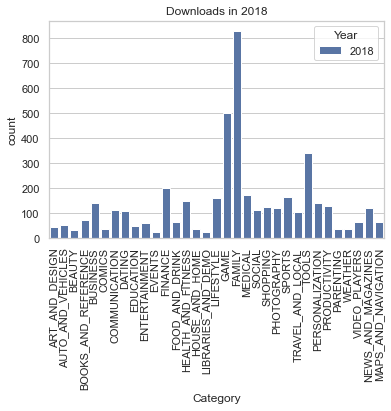

In [91]:
App2018 = playstore_data[playstore_data["Year"] == "2018"]

plt.title("Downloads in 2018")
plt.xticks(rotation = 'vertical')
sns.countplot(hue = 'Year', x = 'Category', data= App2018);

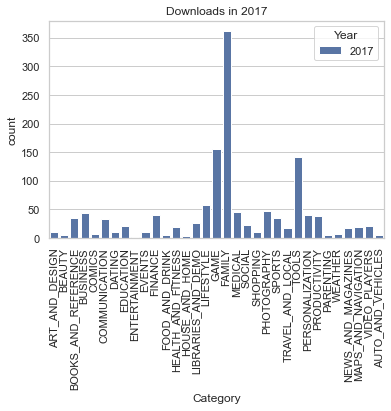

In [92]:
App2017 = playstore_data[playstore_data["Year"] == "2017"]
plt.title("Downloads in 2017")
plt.xticks(rotation = "vertical")
sns.countplot(hue = "Year", x = 'Category', data = App2017);

### Identify the highest paid apps with a good rating
**Assumption** `App` with a rating equal to, or greater than 4 can be considered as `App with good rating`

In [93]:
topRated = playstore_data[(playstore_data.Rating > 4.0) & (playstore_data.Type == "Paid")].sort_values(by="Price", ascending=False)

In [94]:
topRated['Reviews'].head()

4197       6
5369     180
5362     201
5364     129
5356    1867
Name: Reviews, dtype: object

### Are the top-rated apps genuine? How about checking reviews count of top rated apps?

In [96]:
topRated = playstore_data[playstore_data.Rating == playstore_data.Rating.max()]
idx_topRate = np.arange(0, len(topRated))

topRated['Reviews'] = topRated.loc[:,'Reviews'].astype(int)
topRated['Reviews']

/var/folders/sq/k10xxh994030zckw60__y7700000gn/T/ipykernel_10721/903755848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topRated['Reviews'] = topRated.loc[:,'Reviews'].astype(int)


329      15
612       5
615       2
633       5
636       6
         ..
10721    14
10742    32
10776     1
10820    22
10837     4
Name: Reviews, Length: 266, dtype: int64

In [97]:
topRated['Reviews'].max(), topRated['Reviews'].min()

(141, 1)

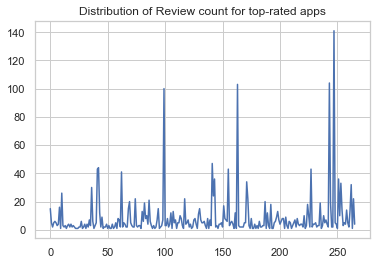

In [98]:
plt.title("Distribution of Review count for top-rated apps")
plt.plot(idx_topRate, topRated['Reviews'])
plt.show()

/Users/imsc/opt/anaconda3/envs/DataScience/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

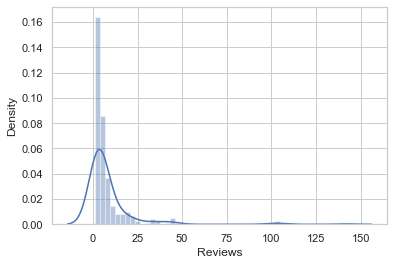

In [99]:
# Frequency distribution of Reviews count
sns.distplot(playstore_data[playstore_data.Rating == playstore_data.Rating.max()].Reviews)

### If the number of reviews of an app is very low, what could be the reason for its top-rated rating?

In [101]:
Apps_Below_review_5 = topRated[topRated['Reviews'] < 5]
Free_apps_below_ReviewCount5 = Apps_Below_review_5[Apps_Below_review_5['Type'] == 'Free'].shape[0]
Paid_apps_below_ReviewCount5 = Apps_Below_review_5[Apps_Below_review_5['Type'] == 'Paid'].shape[0]

Free_apps_below_ReviewCount5 , Paid_apps_below_ReviewCount5


(129, 20)

#### Conclusion: Most of the top-rated and less reviews are free, that why user rated 5.0